# Image Segementation Using Clustering 

 We would be Segementing Images based on Clustering. 

But before we do that, try answering the below questions.


<font color='Red'> 1. What is Image Segemntation? </font><br>
<font color='Red'> 2. Why and Where Image Segemntation is used? </font><br>
<font color='Red'> 3. What is Clustering? </font><br>
<font color='Red'> 4. What are different types of clustering? </font>

**We will be following the below Steps in the Notebook** 
 - Load an Image
 - Preprocess the image
 - Apply clustering
  - We will be using Kmeans and hierarchial Clustering Techniques.
 - Visualize the Image after clustering

In [4]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

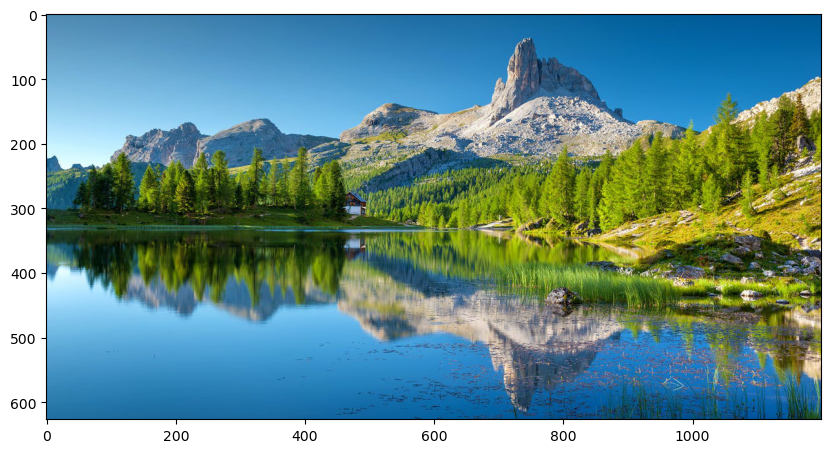

In [5]:
# Import matplotlib image
import matplotlib.image as img
# Import a random image
pic = img.imread("Image.jpeg");

# Check whether Image is loaded
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

The above image as i see is a very beautiful scenary, with a few colors say yelow, green, white, blue etc.

Lets check the shape of the image. Typically it should be three dimensional as it is a colour image having 4 channels say RGB and alph with different intensities to give colours to the image as the third dimension and values represnted are intensities of pixels. 

In [6]:
# Checck shape

pic.shape

(627, 1200, 3)

### Let's implement our first clustering techinque K-Means Clustering

In [7]:
import cv2

ModuleNotFoundError: No module named 'cv2'

We can also read images with Opencv..... But there are differences when compared to image read using matplotlib. What is it??? 
| Feature       | OpenCV          | Matplotlib    |
| ------------- | --------------- | ------------- |
| Channel Order | BGR             | RGB           |
| Pixel Range   | 0–255           | 0–1 (PNG)     |
| Speed         | Fast            | Slower        |
| Main Use      | Computer Vision | Visualization |


Methods of opencv that are used in this Notebook</font>

<font color='Brown'> 1. imread: </font> <font color='Green'> This method is used to read an image as a numpy array.It returns a 2D or 3D matrix based on the number of color channels present in the image. For a binary or grey scale image, 2D array is sufficient. But for a colored image, you need 3D array. </font>

<font color='Brown'> 2. cvtColor: </font> <font color='Green'> to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV. For eg. Converting RGB Image to grayscale. </font>


In [2]:
# Read Image using cv2

pic = cv2.imread("Image.jpeg");
pic

NameError: name 'cv2' is not defined

Below is one major difference reading image using matplotlib and Opencv. OpenCv reads images in BGR format where as matplotlib reads in RGB format

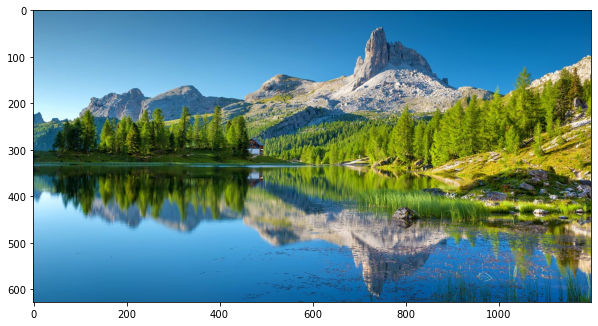

In [73]:
# Change color to RGB (from BGR)
plt.figure(figsize=(10,10))
image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [74]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

Also from the documentation it can be understood the input should be of type float32, So lets convert our image which is an array of pixels values to float

In [75]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals_fl = np.float32(pixel_vals)

Lets apply K-Means clustering for k=1-10 for better understanding of how image is being Segmanted

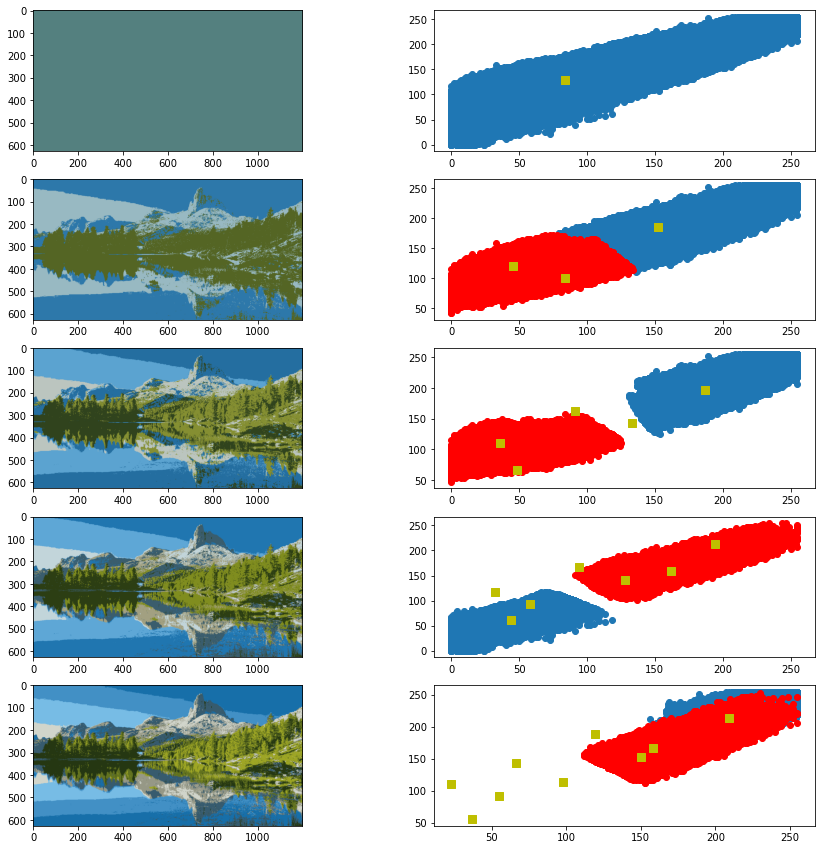

In [76]:
plt.figure(figsize=(15,15))
i=1
for k in range(1,10,2):
    retval, labels, centers = cv2.kmeans(pixel_vals_fl, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.subplot(5,2,i)
    plt.imshow(segmented_image)
    i = i+1
    # Now separate the data, Note the flatten()
    A = pixel_vals[labels.ravel()==0]
    B = pixel_vals[labels.ravel()==1]
    # Plot the data
    plt.subplot(5,2,i)
    plt.scatter(A[:,0],A[:,1])
    plt.scatter(B[:,0],B[:,1],c = 'r')
    plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's')
    i = i+1

- As you can see above, the number of colors in segmented image increases with increasing K. This shows how an image is segmented based on clusters. Also you can see an approximate image being formed as we increase clusters. so if clusters are high enough we get exact Image

- Also you can see cluster centers increasing in the scatterplot

### Let's implement clustering techinque Hierarchial Clustering

Agglomerative is most commonly used and we will be implementing the same.For this we will need to use cluster packahe of sklearn which has [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class.

In [3]:
from sklearn.cluster import AgglomerativeClustering

Only one of distance_threshold and n_clusters should be given. Here i am creating an entire dendogram so using distance_threshold=0 and no clusters.

In [125]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0)

#### Resizing the image as high resolution images cannot be executed and a memory error will be thrown if system is unable to allocate enough memory

In [126]:
scale_percent = 5 # percent of original size
width = int(pic.shape[1] * scale_percent / 100)
height = int(pic.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(pic, dim, interpolation = cv2.INTER_AREA)
resized.shape

(31, 60, 3)

Now we can fit the model, but the shape of image should be less than 2 dimen so below operations are done

In [127]:
X = resized.flatten().reshape(-1,1)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

<font color='Brown'> We will plot a dendogram, but for that we will first device a function and then create a dendogram using scipy library's [dendogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [128]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot a dendogram

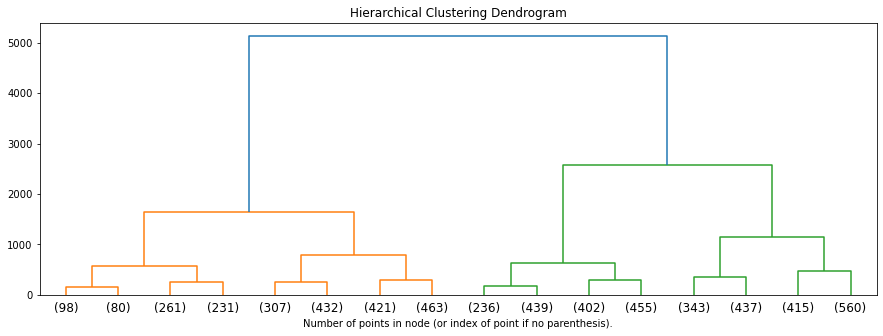

In [130]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Here Above, you can see a clear dendogram of Image that has been clustered using hierarchial clustering.